In [38]:
import pandas as pd 
from tabulate import tabulate
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(20,10))

df = pd.read_csv("data/guns.csv")
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

print(tabulate(df.head(), headers='keys', tablefmt='psql'))


+----+--------+---------+----------+----------+-------+-------+------------------------+------------+-----------------+--------------+
|    |   year |   month | intent   |   police | sex   |   age | race                   |   hispanic | place           | education    |
|----+--------+---------+----------+----------+-------+-------+------------------------+------------+-----------------+--------------|
|  0 |   2012 |       1 | Suicide  |        0 | M     |    34 | Asian/Pacific Islander |        100 | Home            | BA+          |
|  1 |   2012 |       1 | Suicide  |        0 | F     |    21 | White                  |        100 | Street          | Some college |
|  2 |   2012 |       1 | Suicide  |        0 | M     |    60 | White                  |        100 | Other specified | BA+          |
|  3 |   2012 |       2 | Suicide  |        0 | M     |    64 | White                  |        100 | Home            | BA+          |
|  4 |   2012 |       2 | Suicide  |        0 | M     |

<Figure size 2000x1000 with 0 Axes>

Q1 : How does the number of annual sucide gun deaths vary across the years, by gender. 

<Figure size 2000x1000 with 0 Axes>

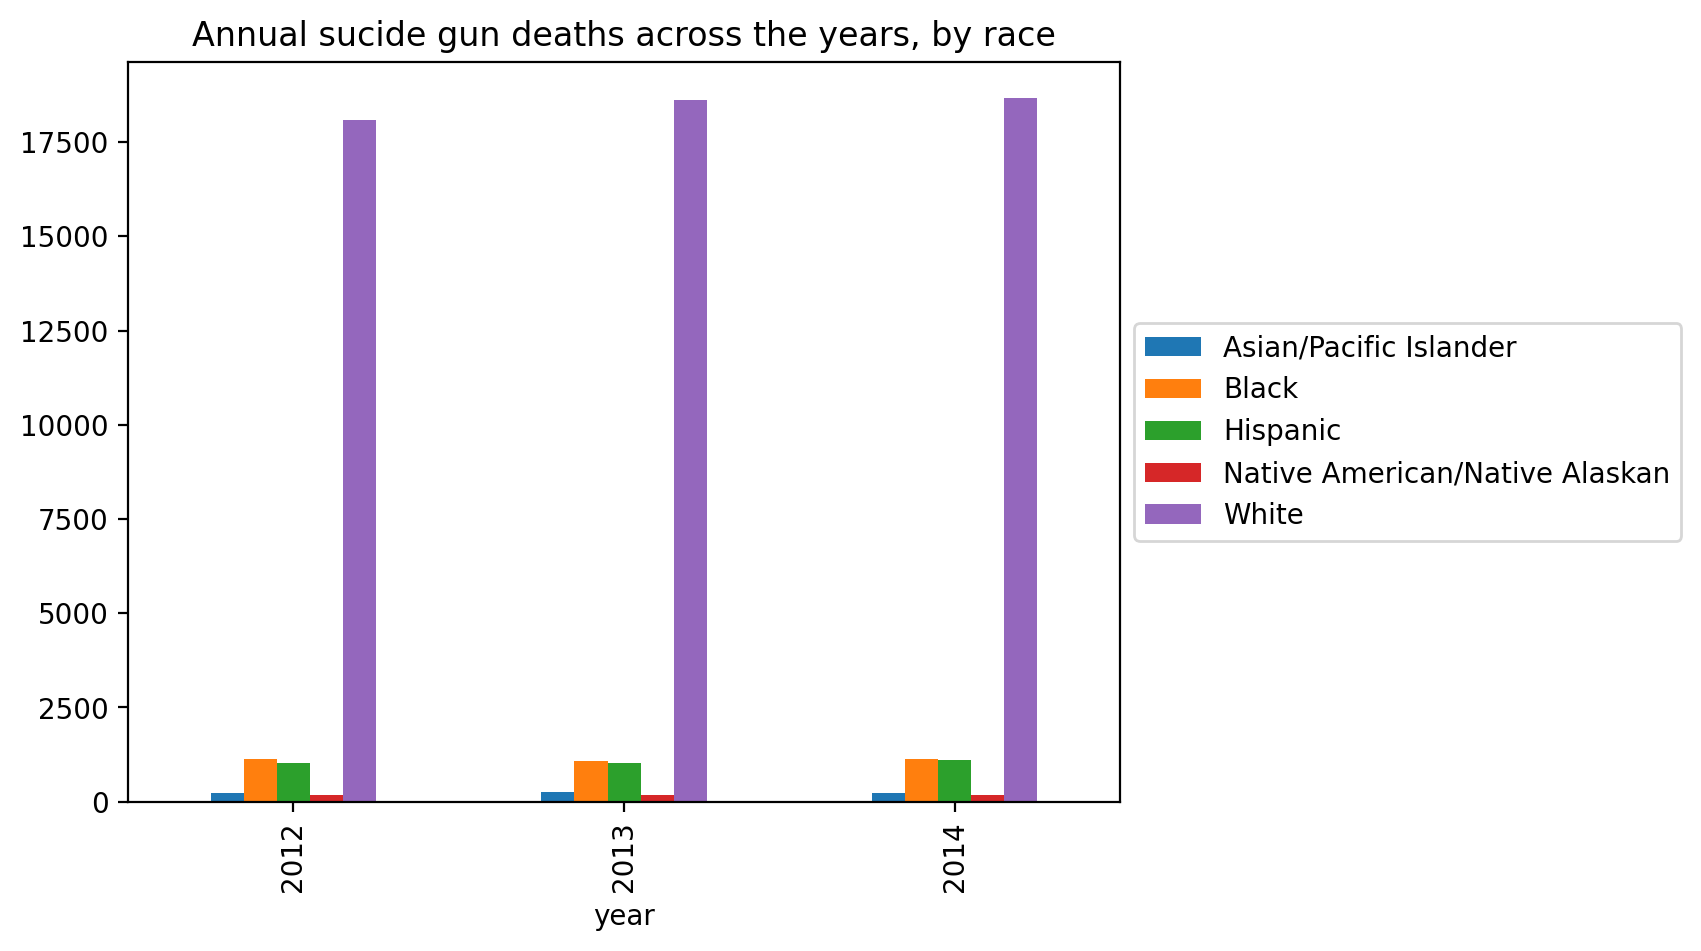

In [39]:
sucide_gun = df[df['intent'] == 'Suicide']

death_rate_year_sex = sucide_gun.groupby(['year','race']).size().reset_index(name='count')

pivoted_data = death_rate_year_sex.pivot(index='year', columns='race', values='count')

plt.figure(figsize=(20,10))
pivoted_data.plot(kind='bar')
plt.title("Annual sucide gun deaths across the years, by race")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()

**What is the number of gundeaths by race per 100,000 people in the USA?**

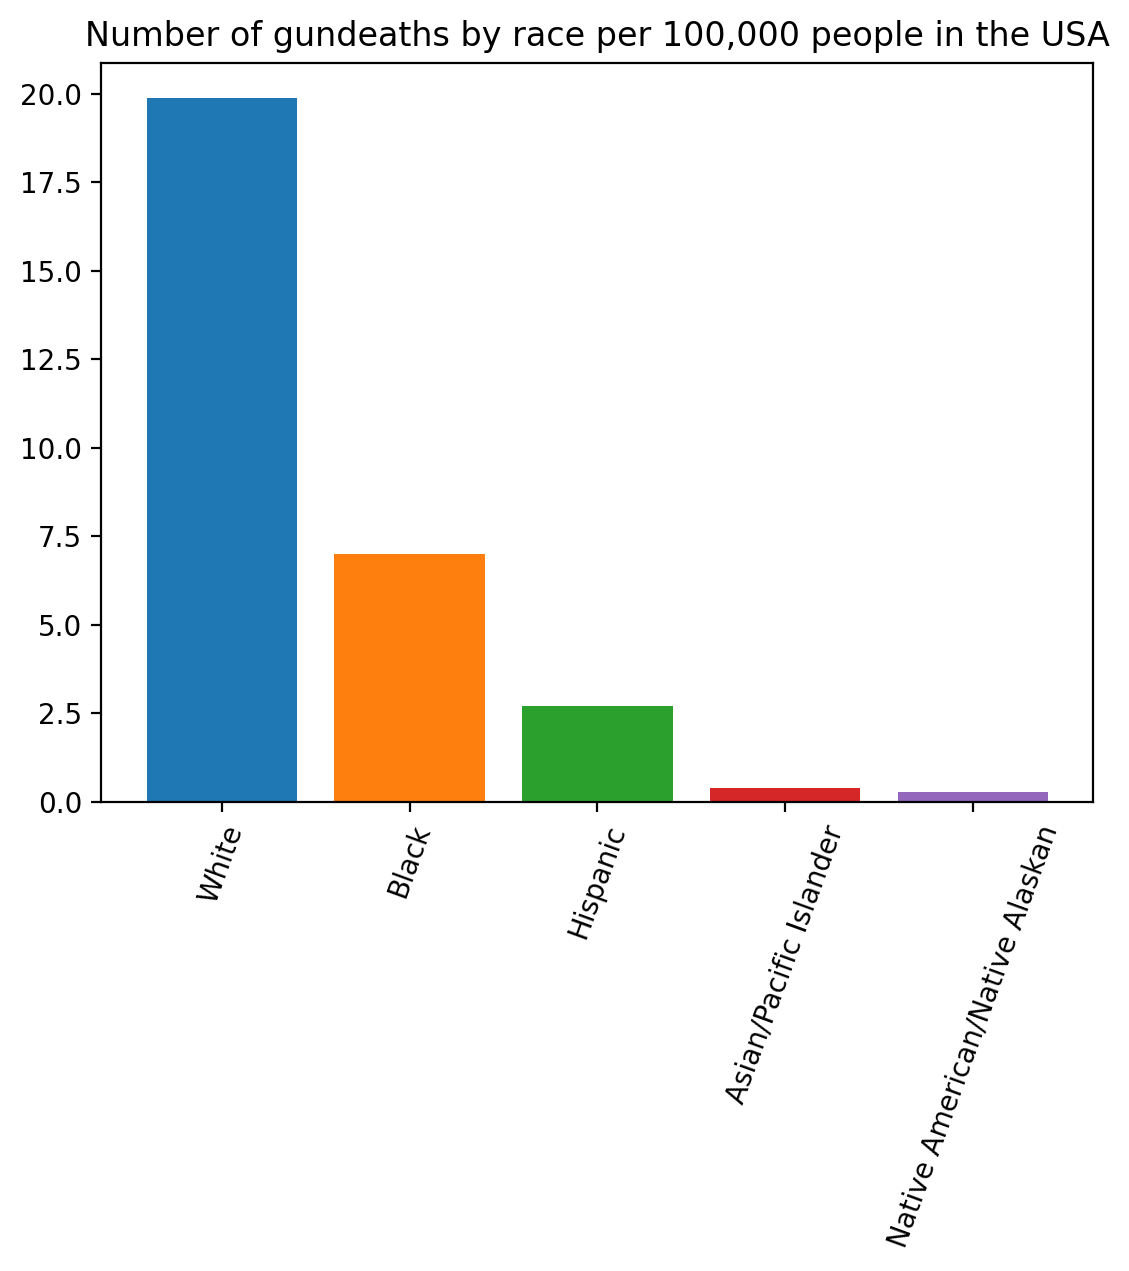

In [40]:
race_prop = df['race'].value_counts().reset_index()
race_prop.columns = ["race", "number"]

# get per 100000
race_prop["normaized"] = (race_prop['number'] / 333000000) * 100000


prop_iter = iter(plt.rcParams['axes.prop_cycle'])

for x , h , c in zip(race_prop["race"], race_prop["normaized"],prop_iter):
    plt.bar(x=x,height=h,color= c['color'])

plt.title("Number of gundeaths by race per 100,000 people in the USA")
plt.xticks(rotation=70)
plt.show()

**What is the average number of gun-deaths by casue, in the USA?**

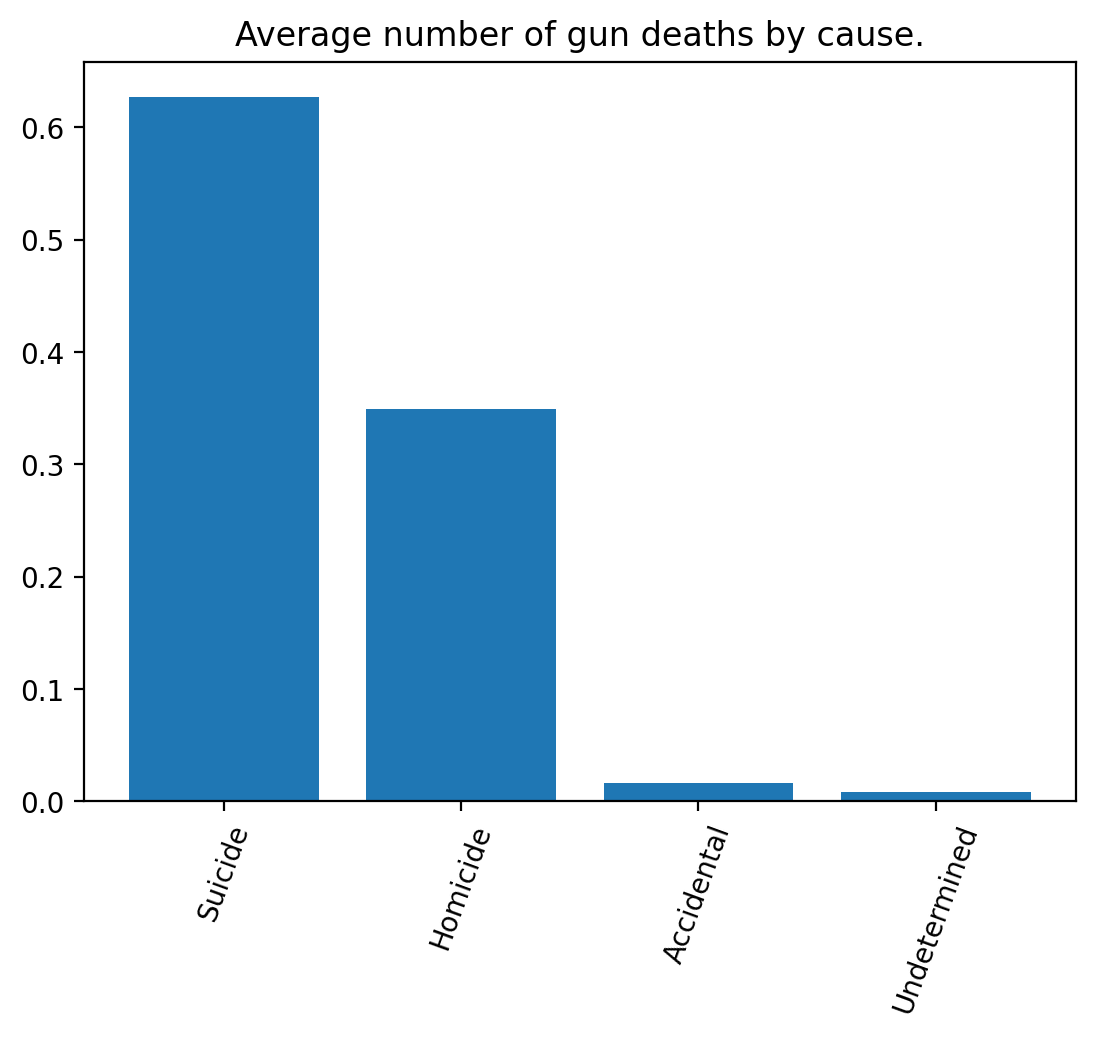

In [41]:
grpd = df["intent"].value_counts().reset_index()
grpd.columns = ["intent", "count"]

grpd["average"] = grpd["count"] / df.shape[0]

plt.bar(x=grpd["intent"], height= grpd["average"])
plt.title("Average number of gun deaths by cause.")
plt.xticks(rotation=70)
plt.show()

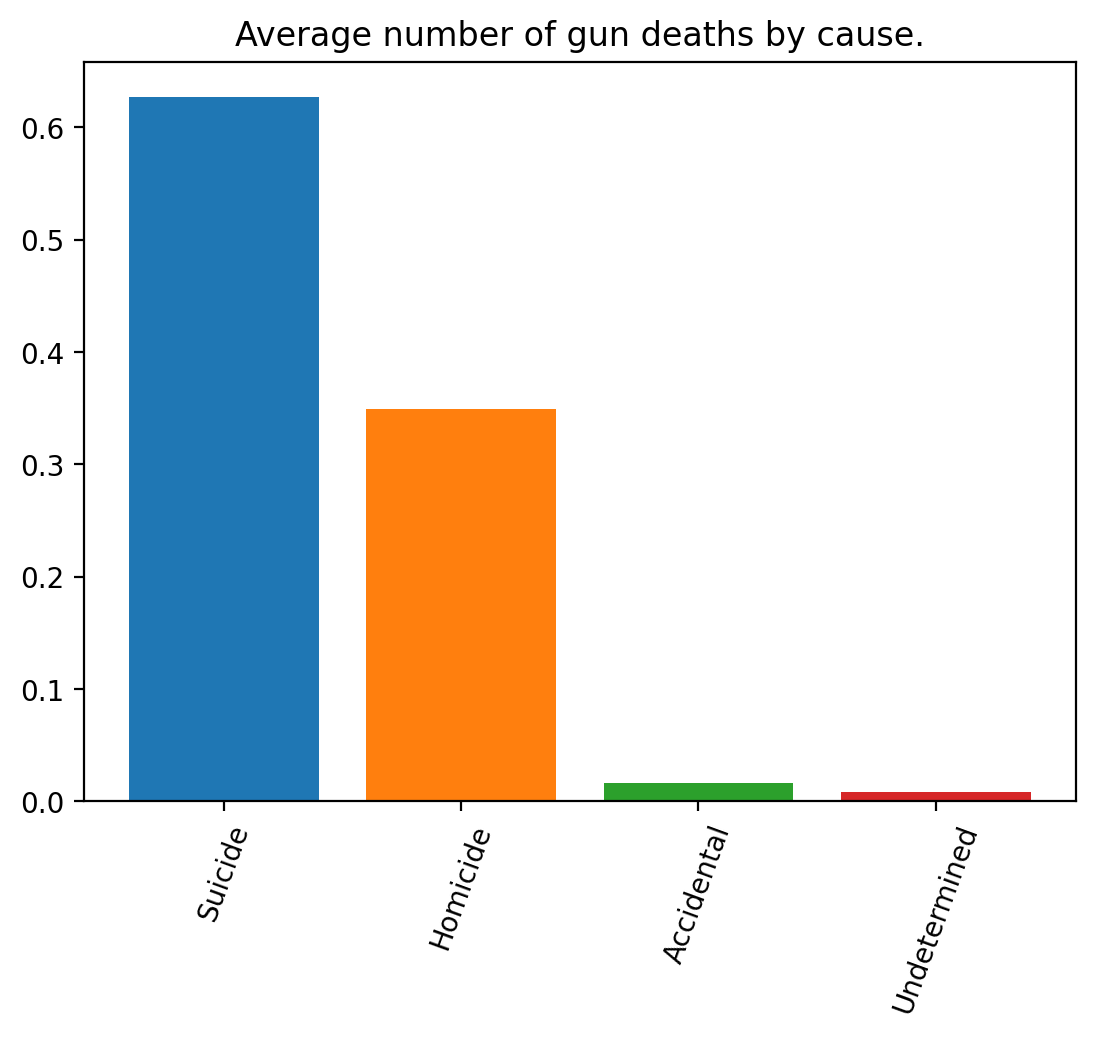

In [42]:
prop_iter = iter(plt.rcParams['axes.prop_cycle'])

for x , h , c in zip(grpd["intent"], grpd["average"],prop_iter):
    plt.bar(x=x,height=h,color= c['color'])
    
plt.title("Average number of gun deaths by cause.")
plt.xticks(rotation=70)
plt.show()

**Q5. What percentage of annual sucide gun deaths in united states from 2012 to 2014 by year?**

In [68]:
filtered = df[df["intent"]=="Suicide"]

In [84]:
overall_by_year = df["year"].value_counts().reset_index().sort_values('year')
overall_by_year

,year,count
2,2012,33563
0,2013,33636
1,2014,33599


In [85]:
filtered_by_year = filtered["year"].value_counts().reset_index().sort_values('year')
filtered_by_year

,year,count
2,2012,20666
1,2013,21175
0,2014,21334


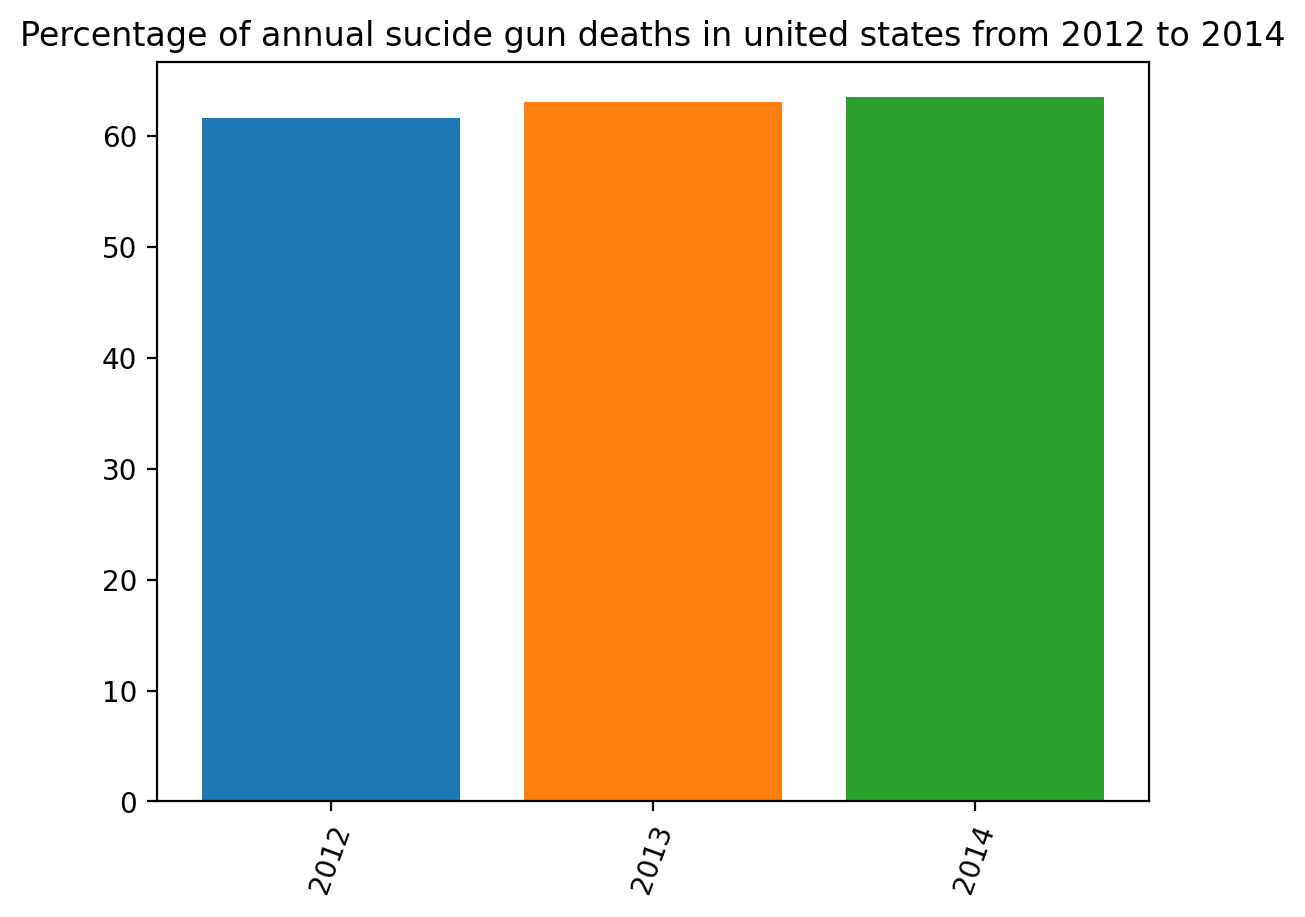

In [86]:
filtered_by_year["normaized"] = (filtered_by_year['count'] / overall_by_year["count"]) * 100



prop_iter = iter(plt.rcParams['axes.prop_cycle'])

for x , h , c in zip(filtered_by_year["year"], filtered_by_year["normaized"],prop_iter):
    plt.bar(x=x,height=h,color= c['color'])

plt.title("Percentage of annual sucide gun deaths in united states from 2012 to 2014")
plt.xticks(filtered_by_year["year"], rotation=70)
plt.show()